In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from simulation import *
from analysis import *
from end_to_end import *

# SIR Model on G(n,p) Network

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### Assumptions:
- Removed inmates can be any state
- Avg. degree of new nodes is correlated with current prison population (aka p is constant)
- Death rate (as in time it takes people to transfer from infected to dead) is equal to the recovery rate

## Possible Things to Work On:

* Simulations are stochastic, so perhaps taking the average over multiple simulations would reduce noise?

## Description of Parameters

* **background_inmate_turnover**: background # of inmates added/released at each time step
* **release_number**: # of inmates to release
* **number_infected_before_release**: number of infected at which to perform release on next integer time
* **rho**: percent of inmates that are initially infected
* **death_rate**: probability of dying after being infected
* **tau**: transmission rate
* **gamma**: recovery rate
* **max_time**: # of time steps to run simulation
* **N**: # of inmates initially
* **p**: probability of contact between inmate and other inmates
* **percent_infected**: percent of general population that is infected
* **percent_recovered**: percent of general population that is recovered
* **save_plot**: should plot of results be saved to computer?
* **stop_inflow_at_intervention**: should we stop the background inflow of inmates at intervention time?
* **title**: title of plot

## Constant Parameters

These parameters are held constant througout the trials.
* background_inmate_turnover=20
* rho=0.0003
* death_rate=0.012
* tau=0.03
* gamma=0.07
* max_time=60
* N=3000
* p=0.02
* percent_infected=0.0035
* percent_recovered=0.0015

**NOTE**: Started experimenting with a lower tau=0.003 in order to produce an initial R0 of about 2.5. Extended max_time too because spread takes longer now.

# Experimental Design

The cases we shall examine are as follows:

1. **Control case**: no release intervention, no stopping of inmate intake
2. **Intervention A**: no release intervention, but stopping of inmate intake
3. **Intervention B**: release intervention and stopping of inmate intake

For case 3, Intervention B, we shall experiment with a range of release numbers and release conditions.

In [59]:
# Parameters
N = 3000
p = 0.02
tau = 0.03
gamma = 0.07
death_rate = 0.012
max_time = 60
social_distance_tau = tau/5
background_inmate_turnover = 20
initial_infected_list = [0]
# By default, starts with only inmate 0 infected

# Build graph on which to run all simulations
G = nx.fast_gnp_random_graph(N, p)

## Control Case

Starting simulation...
Using initial infected list to set initial infected.
Simulation completed.

############### Parameters ###############
{'release_number': 0, 'number_infected_before_release': 10000, 'stop_inflow_at_intervention': False, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': False, 'title': '', 'social_distance': False, 'social_distance_tau': 0.01, 'custom_graph': <networkx.classes.graph.Graph object at 0x000001E9299C2580>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  3964
Total # of deaths:  41.0
Infections peaked at:
	Time: 7.586406757765765
	# of infected: 2475


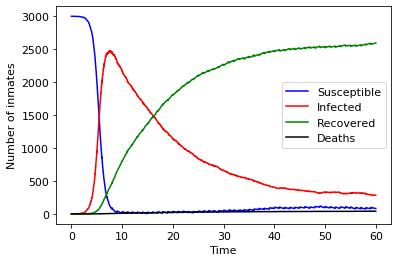

Wall time: 9.34 s


In [60]:
%%time
t, S, I, R, D = (end_to_end(release_number=0, 
                            number_infected_before_release=10000, 
                            stop_inflow_at_intervention=False,
                            social_distance=False,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list))

## Intervention A: no release intervention, but stop inmate inflow & social distance

**NOTE**: For the intervention trials, the intervention does not occur exactly when there are `number_infected_before_release` infected inmates. Instead, the actual intervention occurs at the next integer-valued time step after the `number_infected_before_release` condition has been met. By the time it occurs, the '# of infected' may be much higher than `number_infected_before_release` (I've seen it being 4.5x higher). So, I have ran trials repeatedly until the intervention kicks in at a similar # of infected for each experiment case (around 110 - 120 infected people when the intervention kicks in).

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 4
	# of infected: 204
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 0, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': False, 'title': '', 'social_distance': True, 'social_distance_tau': 0.01, 'custom_graph': <networkx.classes.graph.Graph object at 0x000001E9299C2580>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  2883
Total # of deaths:  31.0
Infections peaked at:
	Time: 13.443941592428246
	# of infected: 1742


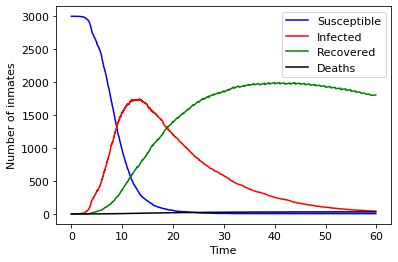

Wall time: 4.24 s


In [61]:
%%time
t, S, I, R, D = (end_to_end(release_number=0, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list))

## Intervention B: release intervention, stopping-inmate-intake, and social distancing

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 3
	# of infected: 362
	Releasing 500 inmates.
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': False, 'title': '', 'social_distance': True, 'social_distance_tau': 0.01, 'custom_graph': <networkx.classes.graph.Graph object at 0x000001E9299C2580>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  2429
Total # of deaths:  25.0
Infections peaked at:
	Time: 11.97420138454672
	# of infected: 1343


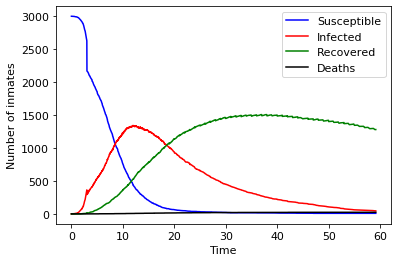

Wall time: 3.57 s


In [62]:
%%time
t, S, I, R, D = (end_to_end(release_number=500, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list))